# Lista 8

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import sklearn
from sklearn.svm import SVR, SVC
from sklearn import metrics
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import linear_model
from sklearn import datasets
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

from mylibs.perceptron import Perceptron
from mylibs.adalineGD import AdalineGD
from mylibs.adalineSGD import AdalineSGD

In [2]:
df = pd.read_csv('pima-indians-diabetes.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.corrwith(df[8])

0    0.221898
1    0.466581
2    0.065068
3    0.074752
4    0.130548
5    0.292695
6    0.173844
7    0.238356
8    1.000000
dtype: float64

In [4]:
X = df[[1, 5]] # 2 features com maior correlacao com y
y = df[8]

### Convertendo dados para array do numpy

In [5]:
X = np.array(X)
X.shape

(768, 2)

### Padronizando dados

In [6]:
X_standard = StandardScaler().fit(X).transform(X)
X_standard

array([[ 0.84832379,  0.20401277],
       [-1.12339636, -0.68442195],
       [ 1.94372388, -1.10325546],
       ...,
       [ 0.00330087, -0.73518964],
       [ 0.1597866 , -0.24020459],
       [-0.8730192 , -0.20212881]])

### Região de decisão

In [7]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    plt.legend(loc='upper left')
    plt.show()

### Perceptron

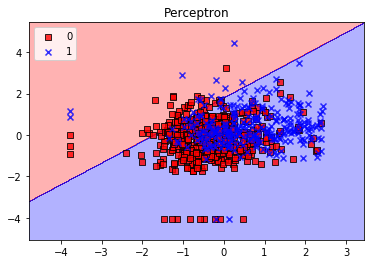

In [8]:
ppn = Perceptron()
ppn.fit(X_standard, y)
plt.title('Perceptron')
plot_decision_regions(X_standard, y, classifier=ppn)

### Adaline GD

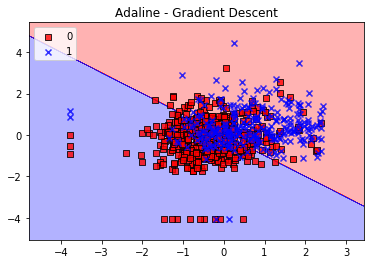

In [9]:
ada = AdalineGD()
ada.fit(X_standard, y)
plt.title('Adaline - Gradient Descent')
plot_decision_regions(X_standard, y, classifier=ada)

### AdalineSGD

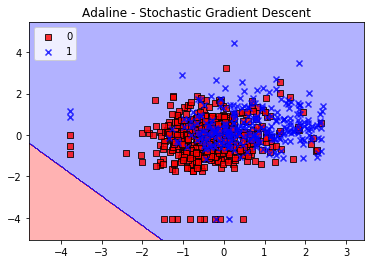

In [10]:
adagd = AdalineSGD()
adagd.fit(X_standard, y)
plt.title('Adaline - Stochastic Gradient Descent')
plot_decision_regions(X_standard, y, classifier=adagd)

### S-Kfold

In [ ]:
#skfold = StratifiedKFold()
#list_accs = []

### Método para mostrar cada modelo

In [ ]:
'''def mostrar_accs(X, y, model, skfold=skfold):
    accs = 0.0
    for train_index, test_index in skfold.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        scaler = StandardScaler().fit(X_train)
        X_train_std = scaler.transform(X_train)
        X_test_std = scaler.transform(X_test)
        
        model.fit(X_train_std, y_train)
        ŷ = model.predict(X_test_std)
        
        accs += metrics.accuracy_score(y_test, ŷ)

    return accs/skfold.n_splits'''

In [ ]:
'''ppn = Perceptron(eta=1, n_iter=10)
ada = AdalineGD(n_iter=20, eta=0.000000001)
s_ada = AdalineSGD(n_iter=50, eta=0.3, random_state=1)
lrg_model = linear_model.LogisticRegression()
knn = neighbors.KNeighborsRegressor()
nb = naive_bayes.GaussianNB()
svm = SVR()

print('Perceptron: {}'.format(mostrar_accs(X, y, ppn)))
print('AdalineGD: {}'.format(mostrar_accs(X, y, ada)))
print('AdalineSGD: {}'.format(mostrar_accs(X, y, s_ada)))
print('Linear Regression: {}'.format(mostrar_accs(X, y, lrg_model)))
print('Naive Bayes: {}'.format(mostrar_accs(X, y, nb)))'''

In [11]:
X = np.array(df)[:,0:7]
acc_perceptron = np.empty((1))
acc_agd = np.empty((1))
acc_asgd = np.empty((1))
acc_svm = np.empty((1))
acc_nb = np.empty((1))
acc_lr = np.empty((1))
acc_knn = np.empty((1))
# kfold

train = sklearn.model_selection.StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
dataset = train.split(X, y)

for train_index, test_index in dataset:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    std_scale = StandardScaler().fit(X_train)
    X_train_std = std_scale.transform(X_train)
    X_test_std = std_scale.transform(X_test)
    
    perceptron  = Perceptron(eta=0.4, n_iter=1000)
    perceptron.fit(X_train_std,y_train)
    y_pred = perceptron.predict(X_test_std)
    acc = metrics.accuracy_score(y_test,y_pred)
    acc_perceptron = np.append(acc_perceptron,acc)
    
    agd = AdalineGD(eta=0.1, n_iter=100)
    agd.fit(X_train_std,y_train)
    y_pred = agd.predict(X_test_std)
    acc = metrics.accuracy_score(y_test,y_pred)
    acc_agd = np.append(acc_agd,acc)
    
    asgd = AdalineSGD(eta=0.1, n_iter=10)
    asgd.fit(X_train_std,y_train)
    y_pred = asgd.predict(X_test_std)
    acc = metrics.accuracy_score(y_test,y_pred)
    acc_asgd = np.append(acc_asgd,acc)
    
    lr = linear_model.LogisticRegression()
    lr.fit(X_train_std,y_train)
    y_pred = lr.predict(X_test_std)
    acc = metrics.accuracy_score(y_test,y_pred)
    acc_lr = np.append(acc_lr,acc)
    
    knn = neighbors.KNeighborsClassifier()
    knn.fit(X_train_std,y_train)
    y_pred = knn.predict(X_test_std)
    acc = metrics.accuracy_score(y_test,y_pred)
    acc_knn = np.append(acc_knn,acc)
    
    nb = naive_bayes.GaussianNB()
    nb.fit(X_train_std,y_train)
    y_pred = nb.predict(X_test_std)
    acc = metrics.accuracy_score(y_test,y_pred)
    acc_nb = np.append(acc_nb,acc)
    
    svc = SVC()
    svc.fit(X_train_std,y_train)
    y_pred = svc.predict(X_test_std)
    acc = metrics.accuracy_score(y_test,y_pred)
    acc_svm = np.append(acc_svm,acc)
    

print("AGD: ",np.mean(acc_agd))
print("ASGD: ",np.mean(acc_asgd))
print("KNN: ",np.mean(acc_knn))
print("LR: ",np.mean(acc_lr))
print("Naive Bayes: ",np.mean(acc_nb))
print("Perceptron: ",np.mean(acc_perceptron))
print("SVM: ",np.mean(acc_svm))

AGD:  13.83700271086061
ASGD:  0.25
KNN:  0.5517404076781491
LR:  0.5654124912975891
Naive Bayes:  0.5634249589913787
Perceptron:  0.45798701016155485
SVM:  0.5585727539435035


## Explique as diferenças entre o Adaline com Gradiente Descendente em Batch e o Adaline com Gradiente Descendente Estocástico.

Gradiente descendente em batch (GD) é mais caro e computacionalmente pois calcula os pesos a partir de todas as amostas do conjunto de treino. Enquanto o estocastico (SGD) é calculado apartir de um simples exemplo de treinamento(o que seria cada linha)